<a href="https://colab.research.google.com/github/sashmos/Data-Mining-Homework/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/4_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_(Matplotlib_Seaborn_Pandas)_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика. Визуальный анализ данных (Matplotlib/Seaborn/Pandas). Часть 2


1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F/3.%20%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_Matplotlib_Seaborn_Plotly.ipynb)
- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [1]:
!pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [2]:
colab = True # если работаете на своём компьютере, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

In [25]:
df = pd.read_csv('/content/drive/Othercomputers/sashmos_laptop/3 семестр (магистр)/Интеллектуальный анализ данных/1. Введение/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


Медиана 'Математика': 66.0
Медиана 'Чтение': 70.0
Медиана 'Письмо': 69.0


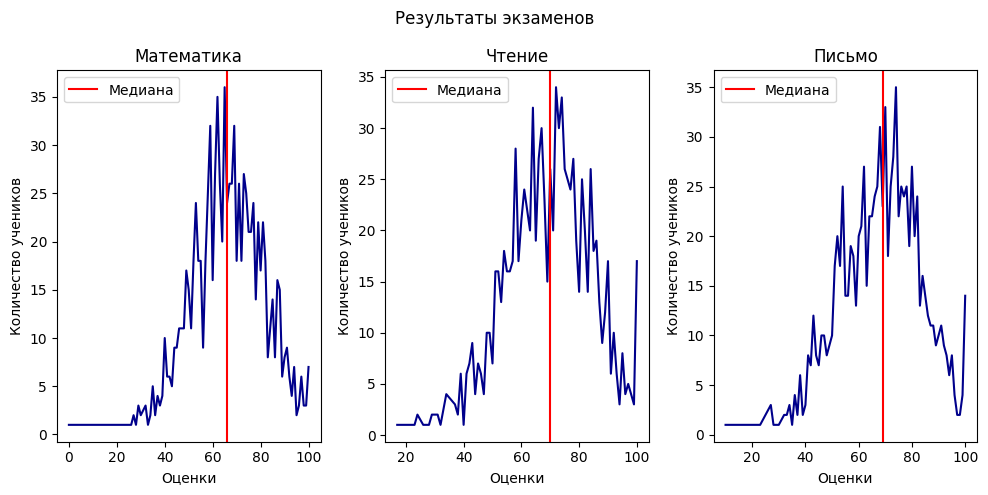

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

fig.suptitle("Результаты экзаменов")

exams = ["Математика", "Чтение", "Письмо"]
exam_scores = ['math score', 'reading score', 'writing score']

for i, exam in enumerate(exam_scores):

    median = df[exam].median()

    ax[i].plot(df[exam].value_counts().sort_index().index,
               df[exam].value_counts().sort_index().values, color='darkblue')
    ax[i].set_title(exams[i])
    ax[i].set_xlabel("Оценки")
    ax[i].set_ylabel("Количество учеников")
    ax[i].axvline(median, color='red', label='Медиана')
    ax[i].legend()

    print(f"Медиана '{exams[i]}': {median}")

plt.tight_layout()
plt.show()


#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


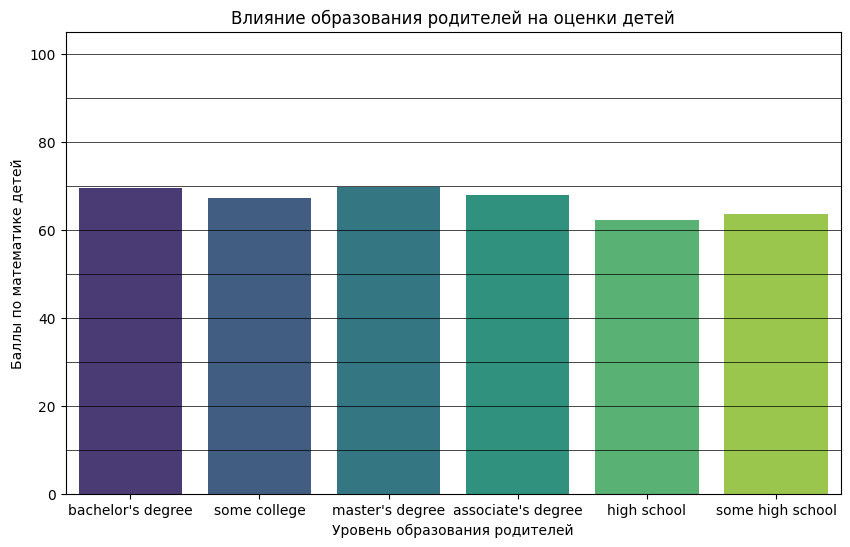

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='parental level of education', y='math score', palette='viridis', ci=None)
plt.title('Влияние образования родителей на оценки детей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Баллы по математике детей')

for i in range(0, 101, 10):
    plt.axhline(y=i, color='black', linewidth = 0.5)

plt.show()

Ответ: Баллы по математике у детей с разным образованием родителей отличаются

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [ ]:
scores = df[(df['gender'] == 'female')
         & (df['math score'] > 90)
         & (df['reading score'] > 90)
         & (df['writing score'] > 90)]
scores_count = len(scores)
print(f"Число студенток, набравших больше 90 баллов по всем предметам: {scores_count}")

Число студенток, набравших больше 90 баллов по всем предметам: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [ ]:
df.groupby('gender').agg({
    'math score': ['min', 'max', 'median'],
    'reading score': ['min', 'max', 'median'],
    'writing score': ['min', 'max', 'median']
    })

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете agg())

In [ ]:
df.groupby(['gender', 'lunch','test preparation course']).agg({
                'math score': 'mean',
                'reading score': 'mean',
                'writing score': 'mean'
                })

math score  reading score  \
gender lunch        test preparation course                              
female free/reduced completed                 60.785714      73.428571   
                    none                      52.890756      63.831933   
       standard     completed                 71.131579      79.798246   
                    none                      66.530233      73.386047   
male   free/reduced completed                 65.639344      65.786885   
                    none                      60.609524      59.076190   
       standard     completed                 75.955752      72.601770   
                    none                      69.832512      64.719212   

                                             writing score  
gender lunch        test preparation course                 
female free/reduced completed                    74.371429  
                    none                         61.781513  
       standard     completed                    81.508772  
                    none                         72.967442  
male   free/reduced completed                    65.737705  
                    none                         55.285714  
       standard     completed                    71.982301  
                    none                         61.906404

Оnвет: Влияет, т.к. после обеда и после прохождения курса средняя оценка во всех случаях выше по всем предметам.

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

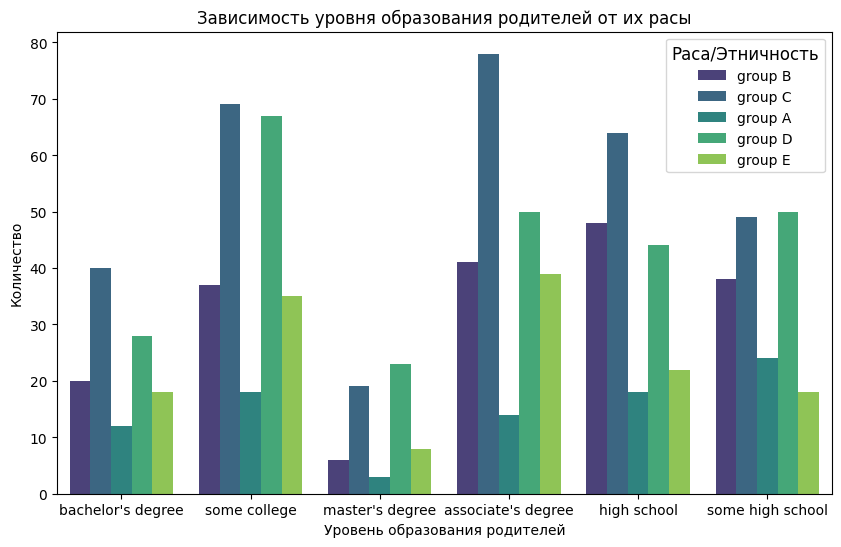

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='parental level of education', hue='race/ethnicity', palette='viridis')
plt.title('Зависимость уровня образования родителей от их расы')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество')
plt.legend(title='Раса/Этничность', title_fontsize='12')
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

бакалавры, магистры: 118
старшая школа: 179
Чаще ходят на курсы дети, родители которых закончили только старшую школу


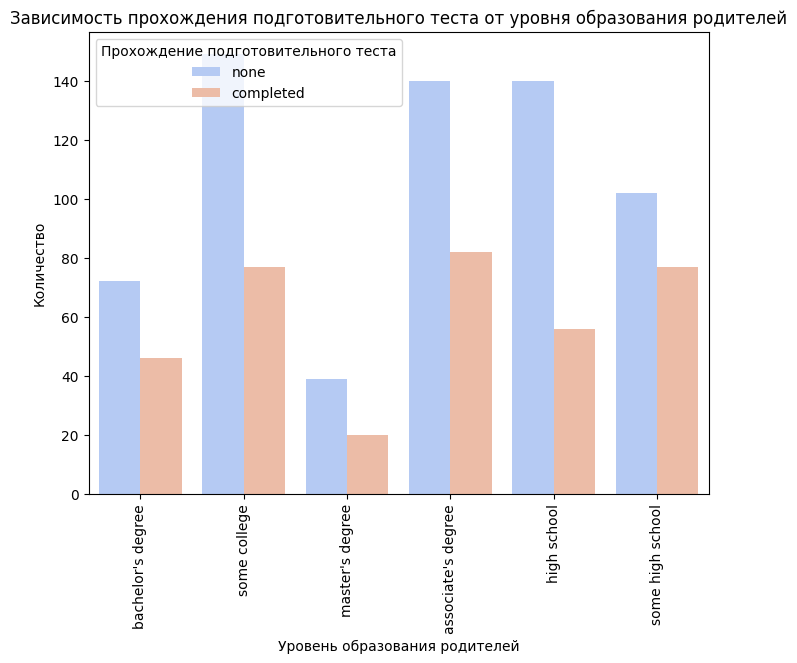

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='parental level of education', hue='test preparation course', palette='coolwarm')
plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.legend(title='Прохождение подготовительного теста')

education_counts = df['parental level of education'].value_counts()
degree_count = (df['parental level of education'].str.startswith('bachelor','master')).sum()
school_count = (df['parental level of education'].str.startswith('some high school')).sum()
print('бакалавры, магистры:',degree_count)
print('старшая школа:',school_count)

if school_count > degree_count:
  print('Чаще ходят на курсы дети, родители которых закончили только старшую школу')
else:
  print('Чаще ходят на курсы дети, чьи родители получили степень бакалавра\магистра')
plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

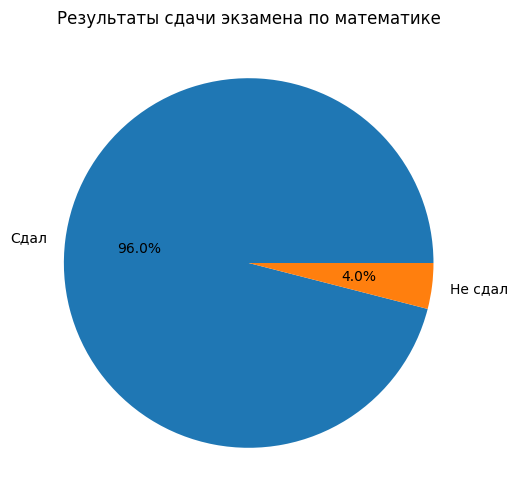

In [22]:
df['pass'] = df['math score'] >= 40

passed_exam = df['pass'].sum()
failed_exam = len(df) - passed_exam

plt.figure(figsize=(6, 6))
plt.pie([passed_exam, failed_exam], labels=['Сдал', 'Не сдал'], autopct='%1.1f%%')
plt.title('Результаты сдачи экзамена по математике')
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

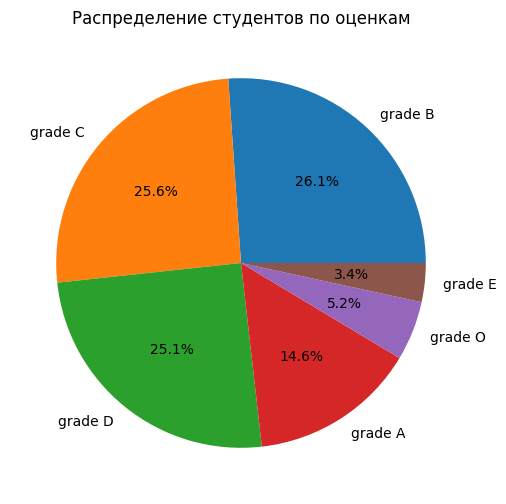

In [18]:
df['total score'] = df.mean(axis=1, numeric_only=True)

# Функция для выставления оценки на основе среднего балла
def mark_to_grade(total_score):
    if total_score >= 90:
        return 'grade O'
    elif 80 <= total_score < 90:
        return 'grade A'
    elif 70 <= total_score < 80:
        return 'grade B'
    elif 60 <= total_score < 70:
        return 'grade C'
    elif 41 <= total_score < 60:
        return 'grade D'
    else:
        return 'grade E'

df['grade'] = df['total score'].apply(mark_to_grade)

grades_count = df['grade'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(grades_count, labels=grades_count.index, autopct='%1.1f%%')
plt.title('Распределение студентов по оценкам')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

Больше всего суммарно оценок О, А, В получили студентки


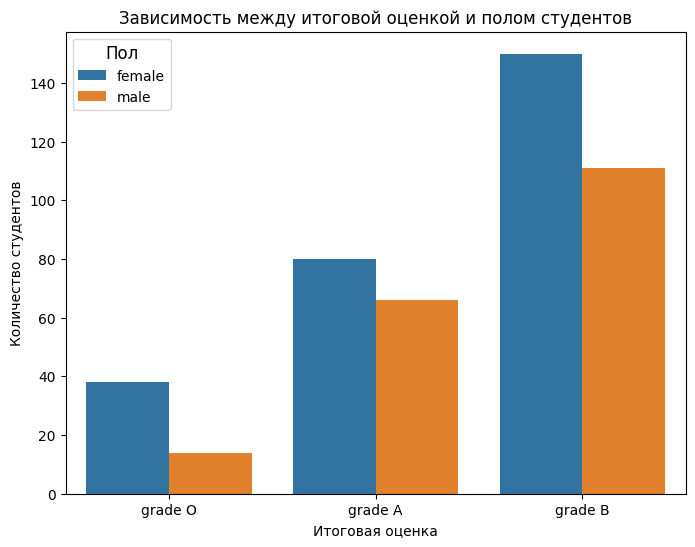

In [19]:
grades_order = ['grade O', 'grade A', 'grade B']

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='grade', hue='gender', order=grades_order)
plt.title('Зависимость между итоговой оценкой и полом студентов')
plt.xlabel('Итоговая оценка')
plt.ylabel('Количество студентов')
plt.legend(title='Пол', title_fontsize='12')

# Подсчет количества всех студентов с оценками O, A и B
grade_counts = df[df['grade'].isin(grades_order)]['gender'].value_counts()

if grade_counts['female'] > grade_counts['male']:
  print('Больше всего суммарно оценок О, А, В получили студентки')
else:
  print('Больше всего суммарно оценок О, А, В получили студенты')

plt.show()